In [1]:
# Adopted from: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html

import numpy as np
import cv2
import matplotlib.pyplot as plt 



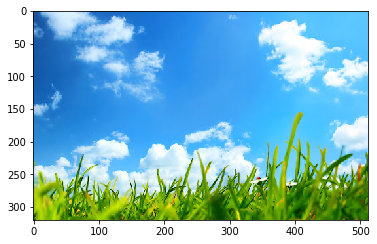

In [2]:
frame = cv2.imread("grass.jpg")
plt.figure()
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))



In [3]:
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)[0,0,:]
print( hsv_green)



[ 60 255 255]


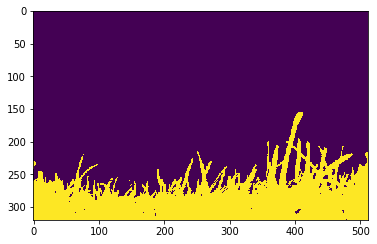

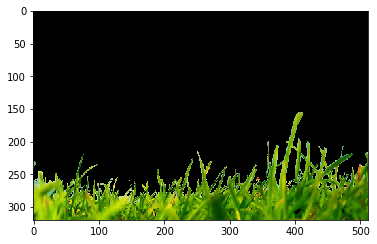

In [4]:
# Convert BGR to HSV
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# define range of hue and intensity 
lower_blue = hsv_green-np.array([70,200,200])
upper_blue = hsv_green+np.array([30,0,0])

# Threshold the HSV image
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(frame,frame, mask= mask)


plt.figure()
plt.imshow(mask)
plt.figure()
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))
